In [2]:
import sklearn
from sklearn.datasets import make_circles

# Creating a data

In [79]:
n_samples = 1000

# create circles
X,y = make_circles(n_samples, 
                  noise=0.03,
                  random_state=42)

In [80]:
len(X), len(y)

(1000, 1000)

In [81]:
X[:5], y[:5]
# 2 features of x relates with 1 feature of y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [13]:
# y has only 2 values which means our model have to predict only 2 values 0 and 1,
# so this is a Binary Classification
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [14]:
type(X)

numpy.ndarray

In [82]:
import pandas as pd

In [83]:
circles = pd.DataFrame({"X1": X[:,0],
                       "X2": X[:, 1],
                       "label":y}
                      )

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [84]:
# Visualize
import matplotlib.pyplot as plt

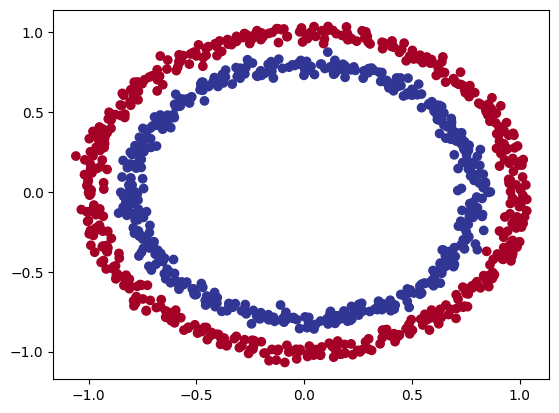

In [85]:
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu)

## Here our problem statement that we need to find is, whether a datapoint sits in blue dot or red dot

# Turning out data into tensors

In [86]:
X.shape, y.shape

((1000, 2), (1000,))

In [87]:
type(X)

numpy.ndarray

In [88]:
X_sample = X[0]
y_sample = y[0]

X_sample, y_sample, X_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,))

In [27]:
# Turning data into tensors

In [28]:
import torch

In [29]:
torch.__version__

'2.1.2+cu121'

In [89]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [90]:
type(X), X.dtype

(torch.Tensor, torch.float32)

# Split data

In [91]:
#Splitting randomly
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,  # w0% of data
                                                   random_state=42)

In [92]:
len(X_train), len(X_test)

(800, 200)

# Building model

In [93]:
import torch
from torch import nn

In [94]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [95]:
# Construct the class model
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 linear layers
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2, out_features=5),
        #     nn.Linear(in_features=5, out_features=1)
        # )

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # X -> layer_1 -> layer_2 -> output
        # return self.two_linear_layers(X)

# Instantiate an instance of model
model = CircleModel()
model, model.state_dict()

(CircleModel(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[-0.1003,  0.5231],
                       [-0.3435, -0.6128],
                       [-0.2840,  0.1352],
                       [-0.2978,  0.3028],
                       [-0.3791, -0.3346]])),
              ('layer_1.bias',
               tensor([ 0.2285,  0.6687, -0.3463, -0.5640,  0.0723])),
              ('layer_2.weight',
               tensor([[ 0.1636, -0.4068,  0.0059, -0.4081,  0.3056]])),
              ('layer_2.bias', tensor([0.3485]))]))

In [96]:
model.parameters()

<generator object Module.parameters at 0x7f97c7e94a50>

In [97]:
# Replicating the model using nn.sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)

)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [98]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[0.0945, 0.2144],
                      [0.5985, 0.6812],
                      [0.1540, 0.1031],
                      [0.2721, 0.0032],
                      [0.2862, 0.6434]])),
             ('0.bias', tensor([-0.1468,  0.4994,  0.0628,  0.6972,  0.1007])),
             ('1.weight',
              tensor([[-0.3794, -0.4242, -0.3308,  0.0776, -0.0254]])),
             ('1.bias', tensor([-0.4427]))])

# Making predicitons using model_0

In [99]:
untrained_preds = model_0(X_test)
len(untrained_preds), untrained_preds.shape, untrained_preds[:10]

(200,
 torch.Size([200, 1]),
 tensor([[-0.7326],
         [-0.9769],
         [-0.2061],
         [-0.8813],
         [-0.3869],
         [-0.5346],
         [-1.0792],
         [-0.9761],
         [-0.1992],
         [-0.9952]], grad_fn=<SliceBackward0>))

In [100]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# Loss function and Optimizer

## Logits

In context of deep learning the logits layer means the layer that feeds in to softmax (or other such normalization). The output of the softmax are the probabilities for the classification task and its input is logits layer. The logits layer typically produces values from -infinity to +infinity and the softmax layer transforms it to values from 0 to 1.

In [101]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

## Calculate accuracy = what % our model does right ?

In [145]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # total number of samples in y_preds that are equal to y_true
    acc = (correct/len(y_pred)) * 100
    return acc

# Train model

### Steps

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss.backward - backpropogation
5. Optimizer step

### logits

raw logits (output of model) -> prediction probabilities -> preidcioon tables

In [61]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2308,  0.0263],
                      [ 0.2045, -0.1332],
                      [-0.6173,  0.0962],
                      [-0.4669, -0.1801],
                      [ 0.0315, -0.0831]])),
             ('0.bias', tensor([-0.0185,  0.4829,  0.4060, -0.6054, -0.5580])),
             ('1.weight',
              tensor([[-0.0034,  0.3054,  0.3886,  0.0871,  0.1397]])),
             ('1.bias', tensor([-0.0929]))])

In [71]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[0.1407],
        [0.0490],
        [0.2410],
        [0.1128],
        [0.0188]])

In [72]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

# Use the sigmoid activation function on logits

In [74]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5351],
        [0.5122],
        [0.5600],
        [0.5282],
        [0.5047]])

In [78]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test[:5])))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

# Training and testing loop

In [103]:
torch.manual_seed(42)

In [110]:
epochs = 100

# build training and evaluation loop

for epoch in range(epochs):

    # model train
    model_0.train()

    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #raw logits (output of model) -> prediction probabilities -> preidcioon tables

    # calcuate accuracy
    loss = loss_fn(y_logits,  #nn.BCEWithLogitsLoss expects raw logits as input
                  y_train)
    acc = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)

    # opmizer zero grad
    optimizer.zero_grad()

    # backpropogation
    loss.backward()

    # optimize
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        # forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # calculate loss
        test_loss = loss_fn(test_logits,
                           y_test)
        test_acc = accuracy_fn(y_true=y_test,
                              y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} , Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, test_acc: {test_acc:2f}%")

Epoch: 0 | Loss: 0.74287 , Acc: 250.00 | Test loss: 0.72908, test_acc: 250.000000
Epoch: 10 | Loss: 0.71254 , Acc: 250.00 | Test loss: 0.70267, test_acc: 250.000000
Epoch: 20 | Loss: 0.70163 , Acc: 250.00 | Test loss: 0.69410, test_acc: 250.000000
Epoch: 30 | Loss: 0.69746 , Acc: 250.00 | Test loss: 0.69156, test_acc: 250.000000
Epoch: 40 | Loss: 0.69567 , Acc: 250.00 | Test loss: 0.69100, test_acc: 250.000000
Epoch: 50 | Loss: 0.69477 , Acc: 250.00 | Test loss: 0.69109, test_acc: 250.000000
Epoch: 60 | Loss: 0.69425 , Acc: 250.00 | Test loss: 0.69136, test_acc: 250.000000
Epoch: 70 | Loss: 0.69391 , Acc: 250.00 | Test loss: 0.69168, test_acc: 250.000000
Epoch: 80 | Loss: 0.69367 , Acc: 250.00 | Test loss: 0.69199, test_acc: 250.000000
Epoch: 90 | Loss: 0.69350 , Acc: 250.00 | Test loss: 0.69228, test_acc: 250.000000


# Make predictions and evaluate the model

## Visualize

In [111]:
import requests
from pathlib import Path

# Download helper function from repo
if Path("helper_functions.py").is_file():
    print("already exists")
else:
    print("Downloading")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

from helper_functions import plot_predictions, plot_decision_boundary

Downloading


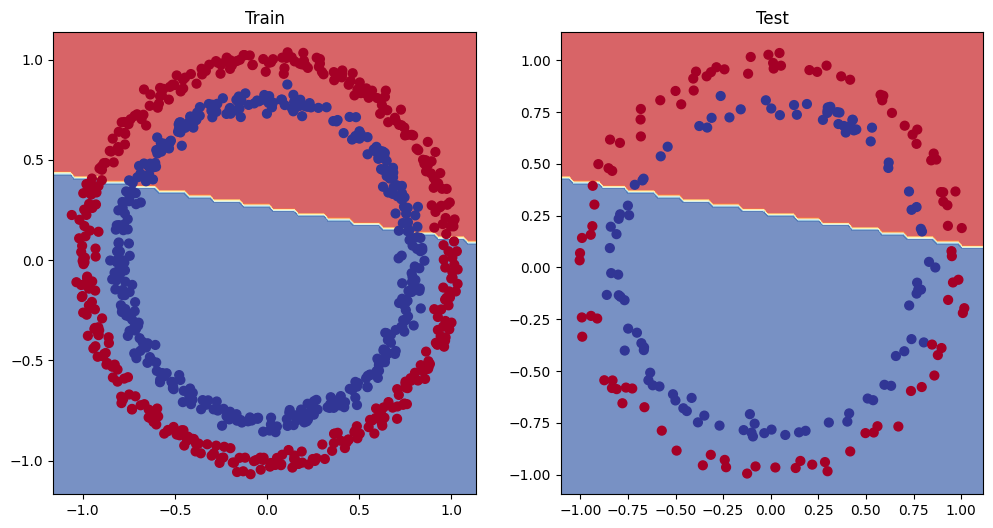

In [114]:
# plot decision boundary of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### Above we visualized that the model is separating the blue and red dots using only straight line but our data is circular. So now we have to improve our model

# Impoving the model

# Non Linearity

### Recreating non linear data

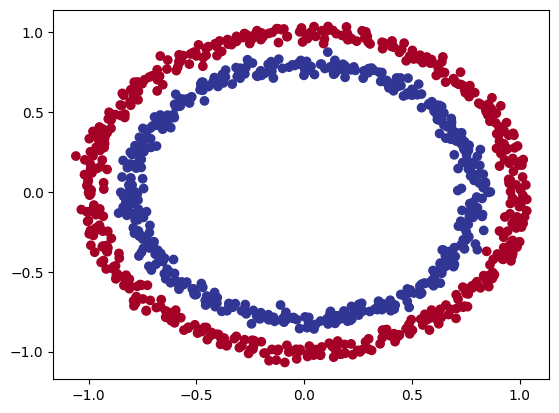

In [149]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Convert data to tensors

In [150]:
import torch
from sklearn.model_selection import train_test_split

# converting to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
X_train[:10]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994],
        [-0.8837, -0.4678],
        [-0.3836,  0.6987],
        [ 0.6047,  0.5163],
        [-0.5869,  0.7804],
        [ 0.8833, -0.5178]])

# Building model with non-linearity

In [151]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # non linear activation func

    def forward(self, x):
        # where should we put non linear activation function
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

# loss function and optimizer

In [152]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                           lr=0.1)


# Training model with non-linearity

In [153]:
torch.manual_seed(42)

In [154]:
epochs=2000

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70683, Accuracy: 50.00% | Test Loss: 0.70463, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69301, Accuracy: 49.75% | Test Loss: 0.69122, Test Accuracy: 54.00%
Epoch: 200 | Loss: 0.69129, Accuracy: 50.75% | Test Loss: 0.68961, Test Accuracy: 56.00%
Epoch: 300 | Loss: 0.68996, Accuracy: 51.38% | Test Loss: 0.68847, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68842, Accuracy: 52.50% | Test Loss: 0.68704, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68640, Accuracy: 52.62% | Test Loss: 0.68518, Test Accuracy: 55.50%
Epoch: 600 | Loss: 0.68360, Accuracy: 53.37% | Test Loss: 0.68279, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.67949, Accuracy: 61.88% | Test Loss: 0.67972, Test Accuracy: 61.00%
Epoch: 800 | Loss: 0.67328, Accuracy: 63.88% | Test Loss: 0.67545, Test Accuracy: 58.50%
Epoch: 900 | Loss: 0.66395, Accuracy: 66.88% | Test Loss: 0.66929, Test Accuracy: 61.00%
Epoch: 1000 | Loss: 0.64945, Accuracy: 66.62% | Test Loss: 0.65917, Test Accuracy: 60.00%
Epoch: 1100 | Loss: 0.

# Make predictions

In [155]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

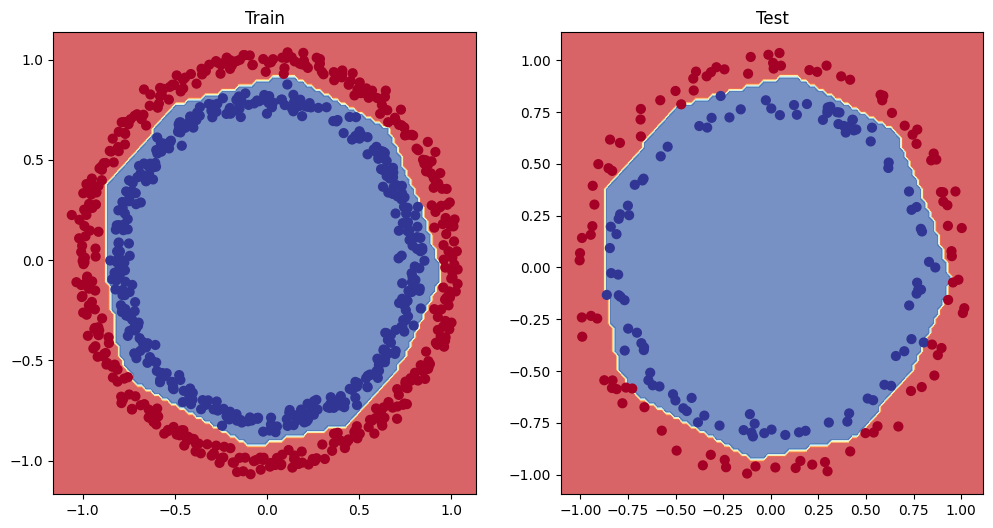

In [156]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)